In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [31]:
df=pd.read_csv("data_train.csv")
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_CONT_MOBILE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,1,Laborers,1.0,2,2,WEDNESDAY,10,0,Business Entity Type 3,0.262949
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1,Core staff,2.0,1,1,MONDAY,11,0,School,0.622246
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,1,Laborers,1.0,2,2,MONDAY,9,0,Government,0.555912
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,1,Laborers,2.0,2,2,WEDNESDAY,17,0,Business Entity Type 3,0.650442
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,1,Core staff,1.0,2,2,THURSDAY,11,0,Religion,0.322738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,1,Sales staff,1.0,1,1,THURSDAY,15,0,Services,0.681632
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,1,NaN,1.0,2,2,MONDAY,8,0,XNA,0.115992
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,1,Managers,1.0,3,3,THURSDAY,9,0,School,0.535722
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,1,Laborers,2.0,2,2,WEDNESDAY,9,1,Business Entity Type 1,0.514163


In [32]:
#check about nulls (empty rows) and its ratio 
null=df.isnull().sum()
ratio=null/df.shape[0]
pd.DataFrame({"Null_sum":null,"Ratio":ratio})

,Null_sum,Ratio
SK_ID_CURR,0,0.000000
TARGET,0,0.000000
NAME_CONTRACT_TYPE,0,0.000000
CODE_GENDER,0,0.000000
FLAG_OWN_CAR,0,0.000000
FLAG_OWN_REALTY,0,0.000000
CNT_CHILDREN,0,0.000000
AMT_INCOME_TOTAL,0,0.000000
AMT_CREDIT,0,0.000000
AMT_ANNUITY,12,0.000039


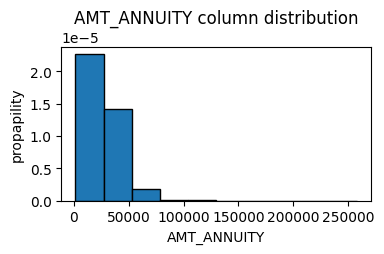

In [33]:
plt.figure(figsize=(4,2))
plt.hist(df['AMT_ANNUITY'],density=True,edgecolor="black")
plt.title("AMT_ANNUITY column distribution")
plt.xlabel("AMT_ANNUITY")
plt.ylabel("propapility")
plt.show()

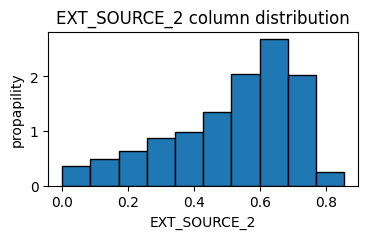

In [34]:
plt.figure(figsize=(4,2))
plt.hist(df['EXT_SOURCE_2'],density=True,edgecolor="black")
plt.title("EXT_SOURCE_2 column distribution")
plt.xlabel("EXT_SOURCE_2")
plt.ylabel("propapility")
plt.show()

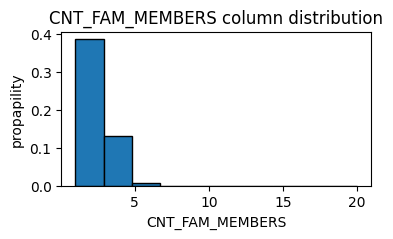

In [35]:
plt.figure(figsize=(4,2))
plt.hist(df['CNT_FAM_MEMBERS'],density=True,edgecolor="black")
plt.title("CNT_FAM_MEMBERS column distribution")
plt.xlabel("CNT_FAM_MEMBERS")
plt.ylabel("propapility")
plt.show()

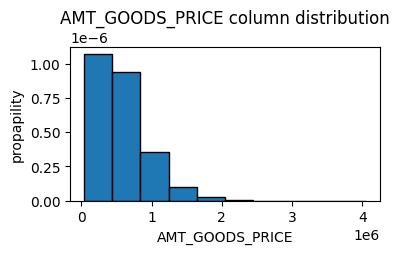

In [36]:
plt.figure(figsize=(4,2))
plt.hist(df['AMT_GOODS_PRICE'],density=True,edgecolor="black")
plt.title("AMT_GOODS_PRICE column distribution")
plt.xlabel("AMT_GOODS_PRICE")
plt.ylabel("propapility")
plt.show()

In [37]:
cols = ["CNT_FAM_MEMBERS", "EXT_SOURCE_2", "AMT_ANNUITY", "AMT_GOODS_PRICE"]
median = df[cols].median()
df[cols] = df[cols].fillna(median)


In [38]:
mode=df["OCCUPATION_TYPE"].mode()[0]
mode
df["OCCUPATION_TYPE"].fillna(mode,inplace=True)

In [39]:
mode=df["NAME_TYPE_SUITE"].mode()[0]
mode
df["NAME_TYPE_SUITE"].fillna(mode,inplace=True)

In [40]:
#check about nulls (empty rows) and its ratio 
null=df.isnull().sum()
ratio=null/df.shape[0]
pd.DataFrame({"Null_sum":null,"Ratio":ratio})

,Null_sum,Ratio
SK_ID_CURR,0,0.0
TARGET,0,0.0
NAME_CONTRACT_TYPE,0,0.0
CODE_GENDER,0,0.0
FLAG_OWN_CAR,0,0.0
FLAG_OWN_REALTY,0,0.0
CNT_CHILDREN,0,0.0
AMT_INCOME_TOTAL,0,0.0
AMT_CREDIT,0,0.0
AMT_ANNUITY,0,0.0


In [41]:
df["TARGET"].value_counts() 

TARGET
0    282686
1     24825
Name: count, dtype: int64

dataset is unbalanced

In [42]:
#show number of unique values in each column and their datatypes
dtypes=df.dtypes
n_uniq=df.nunique()
pd.DataFrame({"Dtypes":dtypes,"Num_Unique":n_uniq})

,Dtypes,Num_Unique
SK_ID_CURR,int64,307511
TARGET,int64,2
NAME_CONTRACT_TYPE,object,2
CODE_GENDER,object,3
FLAG_OWN_CAR,object,2
FLAG_OWN_REALTY,object,2
CNT_CHILDREN,int64,15
AMT_INCOME_TOTAL,float64,2548
AMT_CREDIT,float64,5603
AMT_ANNUITY,float64,13672


In [43]:
#convert some columns into category datatype
cols=["REG_CITY_NOT_LIVE_CITY","WEEKDAY_APPR_PROCESS_START","REGION_RATING_CLIENT_W_CITY","REGION_RATING_CLIENT","OCCUPATION_TYPE","FLAG_CONT_MOBILE","FLAG_WORK_PHONE","FLAG_EMP_PHONE","NAME_HOUSING_TYPE","NAME_FAMILY_STATUS","NAME_EDUCATION_TYPE","NAME_INCOME_TYPE","NAME_TYPE_SUITE","CNT_CHILDREN","FLAG_OWN_REALTY","FLAG_OWN_CAR","CODE_GENDER","NAME_CONTRACT_TYPE","TARGET"]
df[cols]=df[cols].astype('category')
pd.DataFrame(df.dtypes).T

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_CONT_MOBILE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2
0,int64,category,category,category,category,category,category,float64,float64,float64,...,category,category,float64,category,category,category,int64,category,object,float64


In [44]:
df['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [45]:
# Split  data into features and target

X= df.drop(columns=['TARGET'])
y= df['TARGET']

In [46]:
#normalize numerical columns
from sklearn.preprocessing import MinMaxScaler
num_cols=X.select_dtypes('number').columns
scaler=MinMaxScaler()
scaler.fit(X[num_cols])
X[num_cols]=scaler.transform(X[num_cols])
X

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_CONT_MOBILE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2
0,0.000000,Cash loans,M,N,Y,0,0.001512,0.090287,0.090032,0.077441,...,1,Laborers,0.000000,2,2,WEDNESDAY,0.434783,0,Business Entity Type 3,0.307542
1,0.000003,Cash loans,F,N,N,0,0.002089,0.311736,0.132924,0.271605,...,1,Core staff,0.052632,1,1,MONDAY,0.478261,0,School,0.727773
2,0.000006,Revolving loans,M,Y,Y,0,0.000358,0.022472,0.020025,0.023569,...,1,Laborers,0.000000,2,2,MONDAY,0.391304,0,Government,0.650190
3,0.000011,Cash loans,F,N,Y,0,0.000935,0.066837,0.109477,0.063973,...,1,Laborers,0.052632,2,2,WEDNESDAY,0.739130,0,Business Entity Type 3,0.760751
4,0.000014,Cash loans,M,N,Y,0,0.000819,0.116854,0.078975,0.117845,...,1,Core staff,0.000000,2,2,THURSDAY,0.478261,0,Religion,0.377472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.999989,Cash loans,M,N,N,0,0.001127,0.052360,0.101176,0.046016,...,1,Sales staff,0.000000,1,1,THURSDAY,0.652174,0,Services,0.797231
307507,0.999992,Cash loans,F,N,Y,0,0.000396,0.056067,0.040505,0.046016,...,1,Laborers,0.000000,2,2,MONDAY,0.347826,0,XNA,0.135663
307508,0.999994,Cash loans,F,N,Y,0,0.001089,0.157969,0.110618,0.135802,...,1,Managers,0.000000,3,3,THURSDAY,0.391304,0,School,0.626575
307509,0.999997,Cash loans,F,N,Y,0,0.001243,0.081175,0.072499,0.069585,...,1,Laborers,0.052632,2,2,WEDNESDAY,0.391304,1,Business Entity Type 1,0.601360


In [47]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col].astype(str))
X

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_CONT_MOBILE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2
0,0.000000,0,1,0,1,0,0.001512,0.090287,0.090032,0.077441,...,1,8,0.000000,1,1,6,0.434783,0,5,0.307542
1,0.000003,0,0,0,0,0,0.002089,0.311736,0.132924,0.271605,...,1,3,0.052632,0,0,1,0.478261,0,39,0.727773
2,0.000006,1,1,1,1,0,0.000358,0.022472,0.020025,0.023569,...,1,8,0.000000,1,1,1,0.391304,0,11,0.650190
3,0.000011,0,0,0,1,0,0.000935,0.066837,0.109477,0.063973,...,1,8,0.052632,1,1,6,0.739130,0,5,0.760751
4,0.000014,0,1,0,1,0,0.000819,0.116854,0.078975,0.117845,...,1,3,0.000000,1,1,4,0.478261,0,37,0.377472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.999989,0,1,0,0,0,0.001127,0.052360,0.101176,0.046016,...,1,14,0.000000,0,0,4,0.652174,0,43,0.797231
307507,0.999992,0,0,0,1,0,0.000396,0.056067,0.040505,0.046016,...,1,8,0.000000,1,1,1,0.347826,0,57,0.135663
307508,0.999994,0,0,0,1,0,0.001089,0.157969,0.110618,0.135802,...,1,10,0.000000,2,2,4,0.391304,0,39,0.626575
307509,0.999997,0,0,0,1,0,0.001243,0.081175,0.072499,0.069585,...,1,8,0.052632,1,1,6,0.391304,1,3,0.601360


In [48]:
from imblearn.over_sampling import SMOTE

# Make sure you have at least some rows with TARGET = 1 before running this!
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution
print(y_resampled.value_counts())

TARGET
0    282686
1    282686
Name: count, dtype: int64


In [49]:
from sklearn.metrics import accuracy_score
# Split the resampled data into train and test sets
# 80% for training, 20% for testing, with a fixed random state for reproducibility
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [50]:
from sklearn.tree import DecisionTreeClassifier
# Create and train the Decision Tree model
dt = DecisionTreeClassifier(max_depth=15, random_state=42)
dt.fit(X_train, y_train)

# Predict on train and test sets
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Calculate accuracy
dt_train_acc = accuracy_score(y_train, y_train_pred)
dt_test_acc=accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", dt_train_acc)
print("Test Accuracy:", dt_test_acc)

Train Accuracy: 0.8574078536890583
Test Accuracy: 0.8255228830422287


In [51]:
from sklearn.ensemble import RandomForestClassifier


# Create and train the Random Forest model with max_depth and max_features
rf = RandomForestClassifier(n_estimators=100, max_depth=15, max_features='sqrt', random_state=42)
rf.fit(X_train, y_train)

# Make predictions on both training and test sets
y_train_pred  = rf.predict(X_train)
y_test_pred= rf.predict(X_test)

# Calculate and print the accuracies
rf_train_accuracy = accuracy_score(y_train, y_train_pred)
rf_test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {rf_train_accuracy:.4f}")
print(f"Testing Accuracy : {rf_test_accuracy:.4f}")

Training Accuracy: 0.8789
Testing Accuracy : 0.8460


In [52]:
# List of the top 10 important features
top_features = ['HOUR_APPR_PROCESS_START', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR',
                'CNT_FAM_MEMBERS', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
                'CNT_CHILDREN', 'EXT_SOURCE_2', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH']
Y=df['TARGET']
# Extract these features from the original dataframe
X_top = df[top_features]
from sklearn.preprocessing import LabelEncoder
categorical_cols = X_top.select_dtypes(include=['object', 'category']).columns
le = LabelEncoder()
for col in categorical_cols:
    X_top[col] = le.fit_transform(X_top[col].astype(str))

# Apply MinMax scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_top = scaler.fit_transform(X_top)


In [53]:
from imblearn.over_sampling import SMOTE

# Make sure you have at least some rows with TARGET = 1 before running this!
smote = SMOTE(random_state=42)
x_resampled, Y_resampled = smote.fit_resample(X_top, Y)

# Check the new class distribution
print(Y_resampled.value_counts())

TARGET
0    282686
1    282686
Name: count, dtype: int64


In [54]:
x_train, x_test, Y_train, Y_test = train_test_split(x_resampled, Y_resampled, test_size=0.2, random_state=42)


In [55]:
import xgboost as xgb

# Train XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(x_train, Y_train)

# Predict on train and test sets
Y_train_pred = xgb_model.predict(x_train)
Y_test_pred = xgb_model.predict(x_test)

# Calculate accuracy
xg_train_acc = accuracy_score(Y_train, Y_train_pred)
xg_test_acc = accuracy_score(Y_test, Y_test_pred)

# Print both accuracies
print(f"Train Accuracy: {xg_train_acc:.4f}")
print(f"Test Accuracy:  {xg_test_acc:.4f}")

Train Accuracy: 0.9305
Test Accuracy:  0.9282


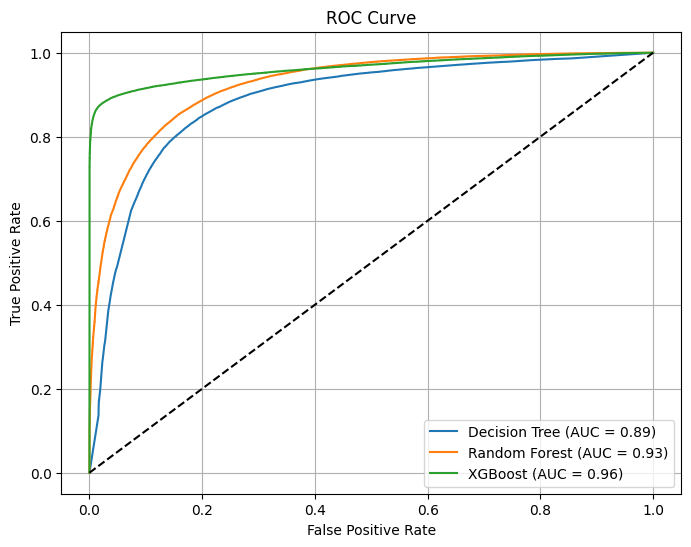

In [56]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

dt_probs = dt.predict_proba(X_test)[:, 1]
rf_probs = rf.predict_proba(X_test)[:, 1]
xgb_probs = xgb_model.predict_proba(x_test)[:, 1]

fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_xgb, tpr_xgb, _ = roc_curve(Y_test, xgb_probs)

auc_dt = auc(fpr_dt, tpr_dt)
auc_rf = auc(fpr_rf, tpr_rf)
auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')

plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [57]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Create a dictionary to store evaluation results for each model
results = {
    "Model": ["Decision Tree", "Random Forest", "XGBoost"],
    
    # Training accuracy for each model
    "Train Accuracy": [
        dt_train_acc,
        rf_train_accuracy,
        xg_train_acc
    ],
    
    # Testing accuracy for each model
    "Test Accuracy": [
        dt_test_acc,
        rf_test_accuracy,
        xg_test_acc
    ],
    
    # Precision score on the test set
    "Precision": [
        precision_score(y_test, dt.predict(X_test)),
        precision_score(y_test, rf.predict(X_test)),
        precision_score(Y_test, xgb_model.predict(x_test))
    ],
    
    # Recall score on the test set
    "Recall": [
        recall_score(y_test, dt.predict(X_test)),
        recall_score(y_test, rf.predict(X_test)),
        recall_score(Y_test, xgb_model.predict(x_test))
    ],
    
    # F1 score on the test set
    "F1 Score": [
        f1_score(y_test, dt.predict(X_test)),
        f1_score(y_test, rf.predict(X_test)),
        f1_score(Y_test, xgb_model.predict(x_test))
    ],
    
    # ROC AUC score using predicted probabilities
    "AUC": [
        roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1]),
        roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]),
        roc_auc_score(Y_test, xgb_model.predict_proba(x_test)[:, 1])
    ]
}

# Convert the dictionary into a pandas DataFrame
df_results = pd.DataFrame(results)

# Display the results
print(df_results)

           Model  Train Accuracy  Test Accuracy  Precision    Recall  \
0  Decision Tree        0.857408       0.825523   0.821227  0.832222   
1  Random Forest        0.878887       0.846040   0.831128  0.868569   
2        XGBoost        0.930497       0.928225   0.972576  0.881303   

   F1 Score       AUC  
0  0.826688  0.887398  
1  0.849436  0.925371  
2  0.924693  0.962874  


#this code to select top 10 features based on feature importance to minimize features in interactive app  

top_n = 10
top_features = fi_df['Feature'].head(top_n).tolist()
X_top = X[top_features]
X_top.columns

In [60]:
import joblib

joblib.dump(xgb_model, "xgb_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']